<a href="https://colab.research.google.com/github/timeseriesAI/timeseriesAI/blob/master/tutorial_nbs/03_Time_Series_Transforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

created by Ignacio Oguiza - email: oguiza@gmail.com

# Time Series Transforms

In [1]:
import sys
import os
ISCOLAB = 'google.colab' in sys.modules
if ISCOLAB:
    # for bleeding edge
    !pip install git+https://github.com/fastai/fastcore.git@master
    !pip install git+https://github.com/fastai/fastai2.git@master
    !pip install git+https://github.com/timeseriesAI/timeseriesAI.git@master 
    
    # for latest stable version
    # !pip install tsai 
    
import tsai
from tsai.all import *
display(HTML("<style>.container {width:95% !important; }</style>"))

In [2]:
print('tsai       :', tsai.__version__)
print('fastai2    :', fastai2.__version__)
print('fastcore   :', fastcore.__version__)
print('torch      :', torch.__version__)
print('scipy      :', sp.__version__)
print('numpy      :', np.__version__)
print('pandas     :', pd.__version__)
print(f'Total RAM  : {bytes2GB(psutil.virtual_memory().total):5.2f} GB')
print(f'Used RAM   : {bytes2GB(psutil.virtual_memory().used):5.2f} GB')
print('n_cpus     :', cpus)
iscuda = torch.cuda.is_available()
if iscuda: print('device     : {} ({})'.format(device, torch.cuda.get_device_name(0)))
else: print('device     :', device)

tsai       : 0.0.6
fastai2    : 0.0.17
fastcore   : 0.1.17
torch      : 1.4.0
scipy      : 1.3.1
numpy      : 1.18.1
pandas     : 0.25.1
Total RAM  :  8.00 GB
Used RAM   :  4.05 GB
n_cpus     : 8
device     : cpu


In [8]:
dsid = 'NATOPS'
X_train, y_train, X_valid, y_valid = get_UCR_data(dsid, parent_dir='./data/UCR/', verbose=True, on_disk=True)
X_train = (X_train + 1) * 2
X_valid = (X_valid + 10) * 20
X = np.concatenate((X_train, X_valid))
y = np.concatenate((y_train, y_valid))
splits = (L(list(np.arange(len(X_train)))), L(list(np.arange(len(X_train), len(X)))))
splits

Dataset: NATOPS
X_train: (180, 24, 51)
y_train: (180,)
X_valid: (180, 24, 51)
y_valid: (180,) 



((#180) [0,1,2,3,4,5,6,7,8,9...],
 (#180) [180,181,182,183,184,185,186,187,188,189...])

In [9]:
tfms = [None, Categorize()]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits, inplace=True)
train_ds = dsets.train
valid_ds = dsets.valid

In [6]:
dls = TSDataLoaders.from_dsets(train_ds, valid_ds, bs=128, num_workers=0, after_batch=[TSStandardize(by_sample=False, by_var=False)])
xb, yb = next(iter(dls.train))
test_close(xb.mean(), 0, eps=1e-1)
test_close(xb.std(), 1, eps=1e-1)
xb, yb = next(iter(dls.valid))
test_not_close(xb.mean(), 0, eps=1e-1)
test_not_close(xb.std(), 1, eps=1e-1)

In [7]:
dls = TSDataLoaders.from_dsets(train_ds, valid_ds, bs=128, num_workers=0, after_batch=[TSNormalize(by_var=False)])
xb, yb = next(iter(dls.train))
test_close(xb.min(), 0, eps=1e-1)
test_close(xb.max(), 1, eps=1e-1)
xb, yb = next(iter(dls.valid))
test_close(xb.min(), 0, eps=1e-1)
test_close(xb.max(), 1, eps=1e-1)

In [10]:
dls = TSDataLoaders.from_dsets(train_ds, valid_ds, bs=128, num_workers=0)
xb, yb = next(iter(dls.train))

In [20]:
%timeit TSIdentity()(xb)

153 µs ± 1.96 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


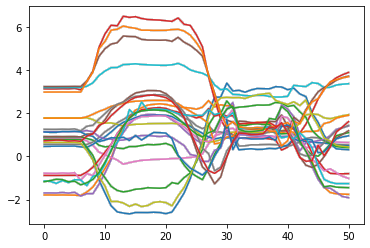

In [21]:
for i in range(100): plt.plot(TSIdentity()(xb[0]).T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [23]:
%timeit TSShuffle_HLs()(xb)

2.56 ms ± 84.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


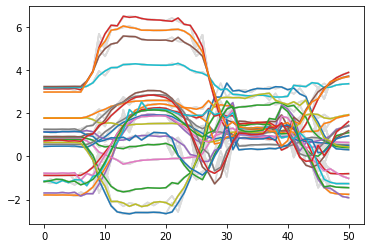

In [24]:
for i in range(10): plt.plot(TSShuffle_HLs()(xb[0]).T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [26]:
%timeit TSMagNoise()(xb)

672 µs ± 4.09 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


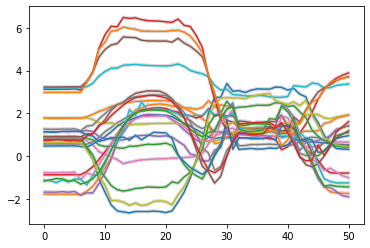

In [38]:
#.02-.2
for i in range(100): plt.plot(TSMagNoise(.02)(xb[0]).T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [33]:
%timeit TSMagMulNoise()(xb)

653 µs ± 6.24 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


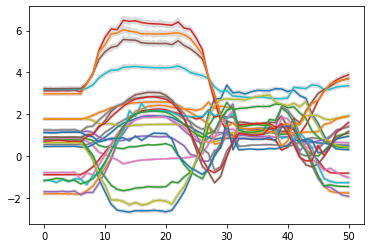

In [37]:
#.01-.1
for i in range(100): plt.plot(TSMagMulNoise(.01)(xb[0]).T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [40]:
%timeit TSTimeNoise()(xb)

29.1 ms ± 1.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


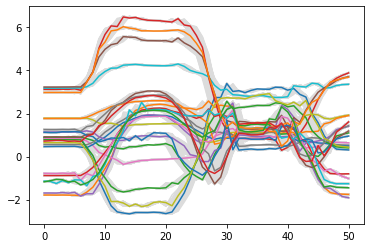

In [43]:
#.1-.5
for i in range(100): plt.plot(TSTimeNoise()(xb[0]).T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [45]:
%timeit TSMagWarp()(xb)

2.08 ms ± 42.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


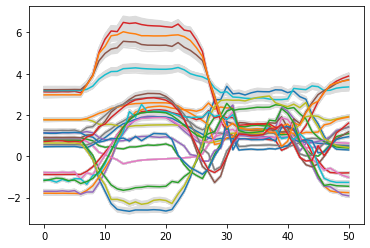

In [54]:
#.02-.2
for i in range(100): plt.plot(TSMagWarp()(xb[0]).T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [51]:
%timeit TSTimeWarp()(xb)

29.8 ms ± 257 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


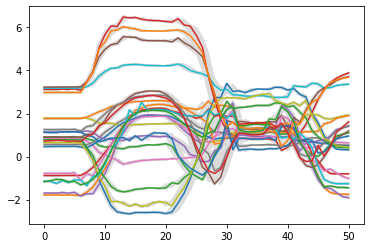

In [57]:
#.02-.2
for i in range(100): plt.plot(TSTimeWarp()(xb[0]).T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [58]:
%timeit TSMagScale()(xb)

699 µs ± 39.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


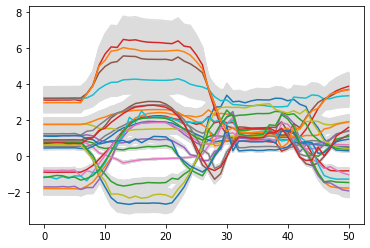

In [60]:
#.02-.2
for i in range(100): plt.plot(TSMagScale()(xb[0]).T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [63]:
%timeit TSMagScaleVar()(xb)

792 µs ± 12 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


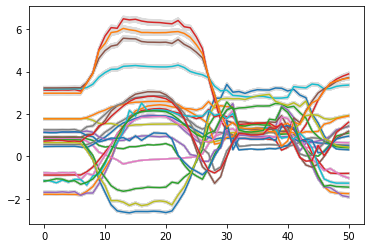

In [62]:
#.02-.2
for i in range(100): plt.plot(TSMagScaleVar()(xb[0]).T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [65]:
%timeit TSZoomIn()(xb)

28.2 ms ± 592 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


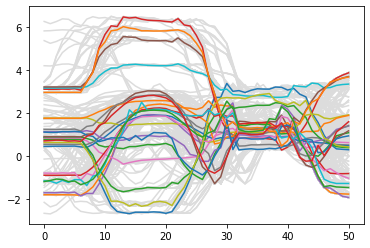

In [66]:
#.02-.2
for i in range(100): plt.plot(TSZoomIn()(xb[0]).T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [68]:
%timeit TSZoomOut()(xb)

32.8 ms ± 863 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


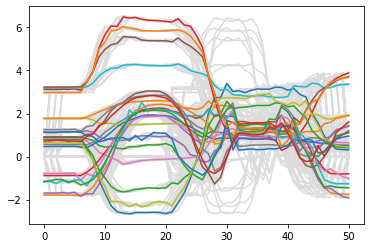

In [69]:
#.02-.2
for i in range(100): plt.plot(TSZoomOut()(xb[0]).T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [119]:
%timeit TSScale()(xb)

35.3 ms ± 2.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


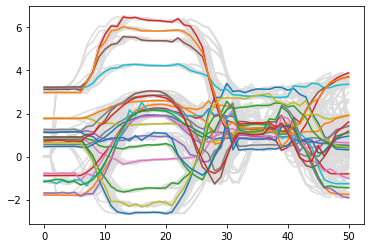

In [72]:
#.02-.2
for i in range(100): plt.plot(TSScale(.02)(xb[0]).T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [120]:
%timeit TSRandomTimeStep()(xb)

37.9 ms ± 2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


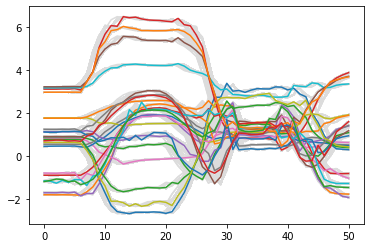

In [74]:
#.02-.2
for i in range(100): plt.plot(TSRandomTimeStep()(xb[0]).T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [121]:
%timeit TSBlur()(xb)

3.69 ms ± 153 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


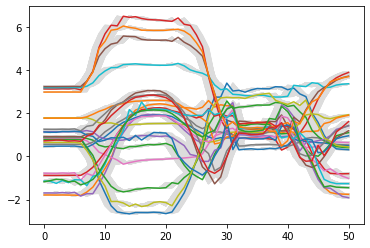

In [77]:
#.05-.5
for i in range(100): plt.plot(TSBlur(.05)(xb[0]).T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [122]:
%timeit TSSmooth()(xb)

3.67 ms ± 140 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


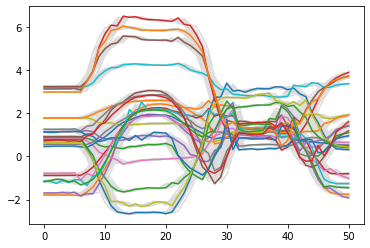

In [79]:
#.05-.5
for i in range(100): plt.plot(TSSmooth()(xb[0]).T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [123]:
%timeit TSDenoise()(xb)

14.6 ms ± 458 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


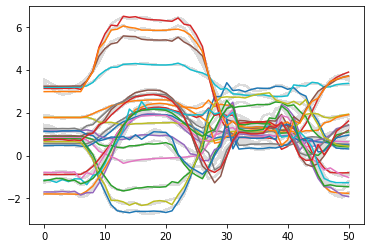

In [85]:
#.1-1
for i in range(100): plt.plot(TSDenoise(.1)(xb[0]).T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [124]:
%timeit TSRandomNoise()(xb)

12.9 ms ± 219 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


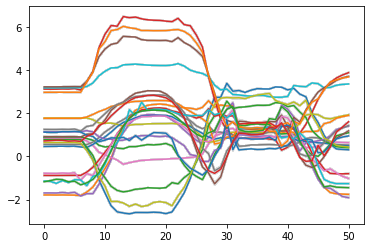

In [86]:
#.1-1
for i in range(100): plt.plot(TSRandomNoise(.1)(xb[0]).T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [125]:
%timeit TSLookBack()(xb)

704 µs ± 30.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


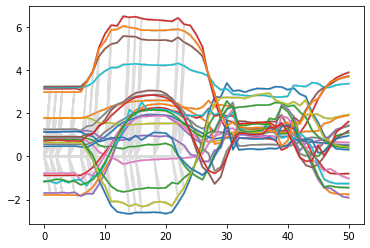

In [88]:
#.01-.1
for i in range(100): plt.plot(TSLookBack()(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [130]:
%timeit TSVarOut()(xb)

751 µs ± 76.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


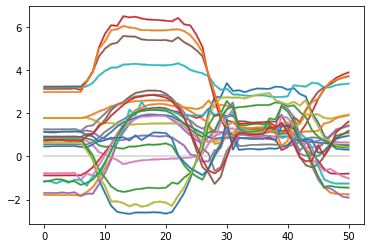

In [98]:
#.05-.5
for i in range(100): plt.plot(TSVarOut()(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [135]:
%timeit TSCutOut()(xb)

882 µs ± 86.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


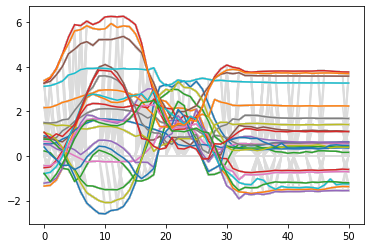

In [136]:
#.05- .5
for i in range(100): plt.plot(TSCutOut()(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [140]:
%timeit TSTimeStepOut()(xb)

1.38 ms ± 25.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


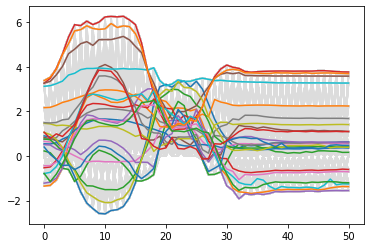

In [141]:
#.1- .5
for i in range(100): plt.plot(TSTimeStepOut()(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [146]:
%timeit TSCrop()(xb)

989 µs ± 58.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


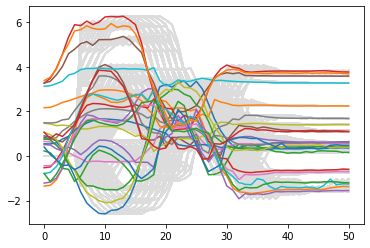

In [147]:
#.50- .5
for i in range(100): plt.plot(TSCrop()(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [151]:
%timeit TSRandomCrop()(xb)

929 µs ± 29.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


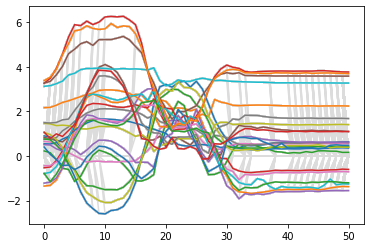

In [153]:
#.05- .5
for i in range(100): plt.plot(TSRandomCrop()(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [309]:
%timeit TSRandomResizedCrop()(xb)

18.3 ms ± 1.93 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


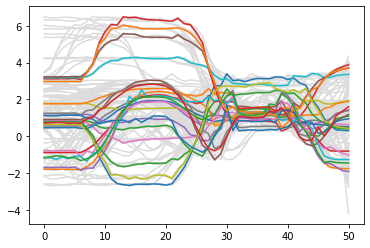

In [101]:
#.01- .1
for i in range(100): plt.plot(TSRandomResizedCrop()(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [155]:
%timeit TSCenterCrop()(xb)

891 µs ± 24.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
#.05- .5
for i in range(100): plt.plot(TSCenterCrop()(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [160]:
%timeit TSMaskOut()(xb)

6.64 ms ± 244 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


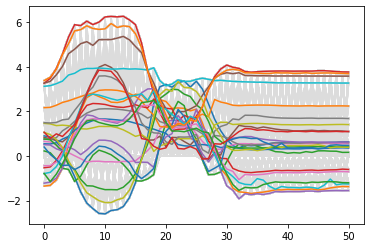

In [161]:
#.05- .5
for i in range(100): plt.plot(TSMaskOut()(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [167]:
%timeit TSTranslateX()(xb)

264 µs ± 8.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


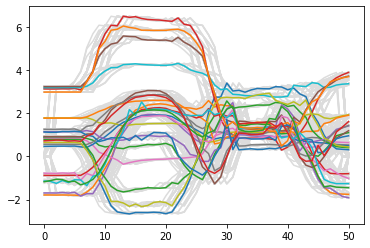

In [103]:
#.1- .5
for i in range(100): plt.plot(TSTranslateX()(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [170]:
%timeit TSFlip()(xb)

16.3 ms ± 363 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


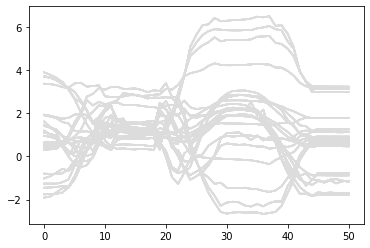

In [128]:
for i in range(10): plt.plot(TSFlip()(xb)[0].T, color='gainsboro')
# plt.plot(xb[0].T)
plt.show()

In [132]:
%timeit TSRandomFlip()(xb)

8.02 ms ± 948 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


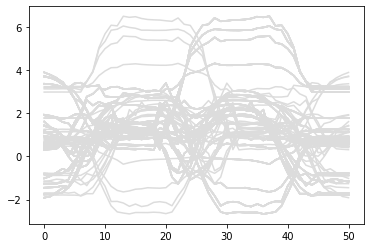

In [131]:
for i in range(10): plt.plot(TSRandomFlip()(xb)[0].T, color='gainsboro')
# plt.plot(xb[0].T)
plt.show()

In [173]:
%timeit TSShift()(xb)

1.15 ms ± 60.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


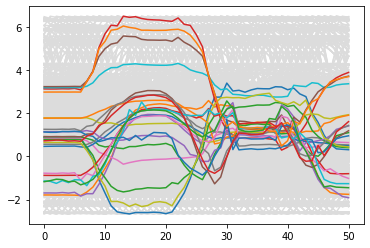

In [135]:
for i in range(100): plt.plot(TSShift(.01)(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [178]:
%timeit TSRandomRotate()(xb)

2.83 ms ± 117 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


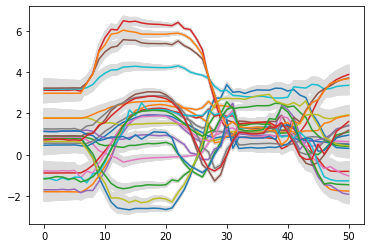

In [137]:
#.1-.5
for i in range(100): plt.plot(TSRandomRotate()(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [185]:
%timeit TSNeg()(xb)

556 µs ± 26.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


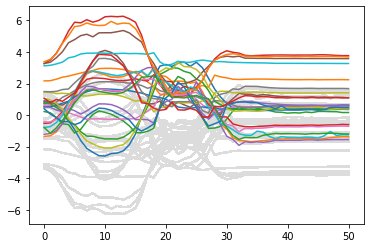

In [186]:
for i in range(100): plt.plot(TSNeg()(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [141]:
%timeit TSRandomNeg()(xb)

344 µs ± 10.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


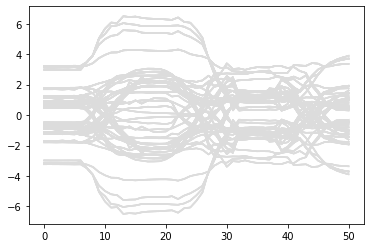

In [144]:
for i in range(10): plt.plot(TSRandomNeg()(xb)[0].T, color='gainsboro')
# plt.plot(xb[0].T)
plt.show()

In [188]:
%timeit TSFreqNoise()(xb)

13.1 ms ± 764 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


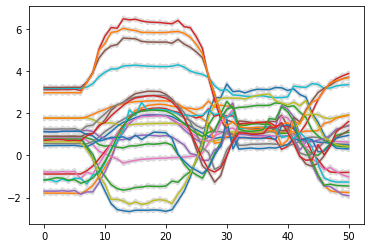

In [148]:
#.1-.5
for i in range(100): plt.plot(TSFreqNoise()(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [194]:
%timeit TSFreqWarp()(xb)

51.4 ms ± 3.87 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


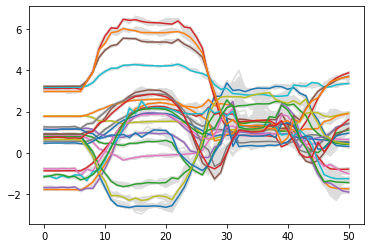

In [155]:
#.1-.5
for i in range(100): plt.plot(TSFreqWarp()(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [197]:
%timeit TSFreqScale()(xb)

13.1 ms ± 586 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


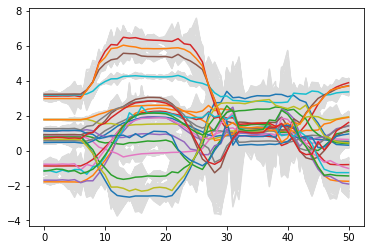

In [159]:
#.5-5.
for i in range(100): plt.plot(TSFreqScale()(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

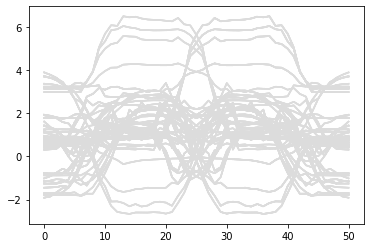

In [163]:
for i in range(10): plt.plot(Pipeline(TSRandomFlip(), TSRandomNeg())(xb)[0].T, color='gainsboro')
# plt.plot(xb[0].T)
plt.show()

In [132]:
class RandAugment():
    def __init__(self, tfms:list, N:int=1, M=0, **kwargs):
        '''
        tfms: list of available tfms
        N: number of tfms applied each time (usual values 1-3)
        M: magnitude of the tfm (1-10, usually 3-5)
        kwargs: tfm kwargs
        '''

        if isinstance(L(tfms)[0], list): tfms = tfms[0]        
        if isinstance(tfms, tuple):
            tfms = [tfms]
            self.tup = True
        else:
            tfms = L(tfms)
            self.tup = False
            if isinstance(tfms[0], tuple): self.tup = True
        self.n_tfms = len(tfms)
        self.tfms,self.kwargs = tfms,kwargs
        assert self.tfms is not None and len(L(self.tfms)) > 0, print('No tfms passed to RandAugment')
        self.N = min(len(L(self.tfms)), N)
        if isinstance(M, tuple): 
            self.M = tuple([float(min(10, m)) / 10 for m in M])
            self.M_tuple = True
        else:
            self.M = float(min(10, M)) / 10 if M is not None else M
            self.M_tuple = False
#         print('tfms:', self.tfms, 'n_tfms:', self.n_tfms, 'tuple:', self.tup)

    def __call__(self, x):
        
        tfms = []
        if self.N == 0 or self.M == 0: return x
        elif self.n_tfms == 1: self.sel_tfms = self.tfms
        else: self.sel_tfms = np.array(self.tfms)[np.random.choice(np.arange(self.n_tfms), self.N, replace=False)]
        if self.tup: 
            for tfm, minval, maxval in self.sel_tfms:
                if self.M is None: tfms += [tfm(**self.kwargs)]
                else:
                    if self.M_tuple: M = (np.max(self.M) - np.min(self.M)) * np.random.rand()
                    else: M = self.M
                    mag = M * float(maxval - minval) + minval
                    tfms += [tfm(magnitude=mag, **self.kwargs)]
        else:
            for tfm in self.sel_tfms:
                if self.M is None: tfms += tfm(**self.kwargs)
                else: 
                    if self.M_tuple: M = (np.max(self.M) - np.min(self.M)) * np.random.rand()
                    else: M = self.M
                    tfms += [tfm(M , **self.kwargs)]
        return Pipeline(tfms)(x)
    
    
@patch
def randaugment(self:Learner, tfms:list, N:int=2, M:int=None, **kwargs)->Learner:
    self.data.train_dl.tfms = RandAugment(tfms, N=N, M=M, **kwargs)
    return learn

In [126]:
BB_tfms = [TSIdentity, TSMagScale, partial(TSRandomTimeStep), TSShuffle_HLs, partial(TSTimeWarp, ex=0), TSMagScaleVar,
           TSRandomRotate,partial(TSMagWarp, ex=0), partial(TSTimeNoise, ex=0)]

In [128]:
for i in range(100): 
    xb2 = RandAugment(BB_tfms, N=3, M=1)(xb)
    test_eq(xb2.shape, xb.shape)
    assert not np.array_equal(xb2.data, xb.data)

In [129]:
BB_tfms = [
    (TSIdentity, 0., 1.),
    (TSMagScale, .02, .2),
    (partial(TSRandomTimeStep), .02, .2),
    (TSShuffle_HLs, 0., 1.),
    (partial(TSTimeWarp, ex=0), .02, .2),
    (TSMagScaleVar, .02, .2),
    (TSRandomRotate, .1, .5),
    (partial(TSMagWarp, ex=0), .02, .2),
    (partial(TSTimeNoise, ex=0), .05, .5),
]

In [130]:
for i in range(100): 
    xb2 = RandAugment(BB_tfms, N=3, M=1)(xb)
    test_eq(xb2.shape, xb.shape)
    assert not np.array_equal(xb2.data, xb.data)

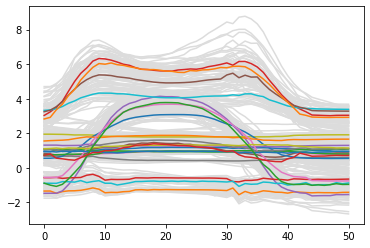

In [131]:
for i in range(20): plt.plot(RandAugment(BB_tfms, N=3, M=5)(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()